# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [8]:
import pandas as pd

table = pd.read_csv("advertising.csv")

display(table)


,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

              TV     Radio    Jornal    Vendas
TV      1.000000  0.054809  0.056648  0.901208
Radio   0.054809  1.000000  0.354104  0.349631
Jornal  0.056648  0.354104  1.000000  0.157960
Vendas  0.901208  0.349631  0.157960  1.000000


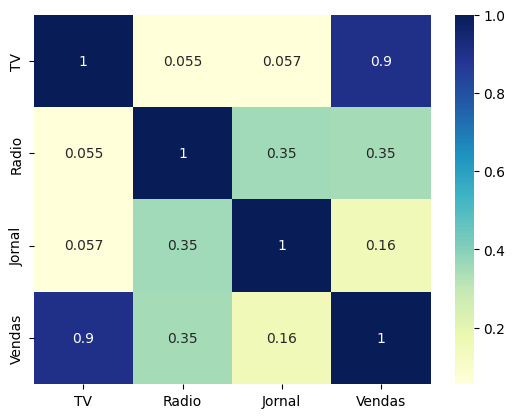

In [20]:
# correlação = número que vai de 0 a 1.
print(table.corr())

# matplotlib e seaborn: duas bibliotecas de gráficos além do plotly

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(table.corr(), cmap="YlGnBu", annot=True)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [39]:
#A coluna de vendas(y) é o que quer prever. As demais colunas(x) são os elementos usados para a previsão
x = table[['TV', 'Radio', 'Jornal']]
y = table['Vendas']
# 1 coluna, um par de colchetes. 2 ou mais colunas, dois pares de colchetes

# separação entre dados de treino e dados de teste (x_treino, x_teste, y_treino, y_teste)
#A maior parte do processo será em treino
# scikit-learn install

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)



#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [40]:
# importar a IA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [41]:
previsao_regresaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn.metrics import r2_score

print(r2_score(y_teste, previsao_regresaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))

0.9040226247767711
0.923315452090668


#### Visualização Gráfica das Previsões

,y_teste,Previsao Arvore Decisao,Previsao Regressao Linear
10,12.6,9.777,8.881600
135,11.6,12.024,12.536353
103,19.7,19.603,16.855770
98,25.4,25.112,24.945079
8,4.8,5.280,5.493027
4,17.9,17.184,15.468534
187,17.3,18.604,18.289527
157,10.1,15.850,12.977064
67,13.4,13.232,13.951358
31,11.9,12.303,12.613785


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

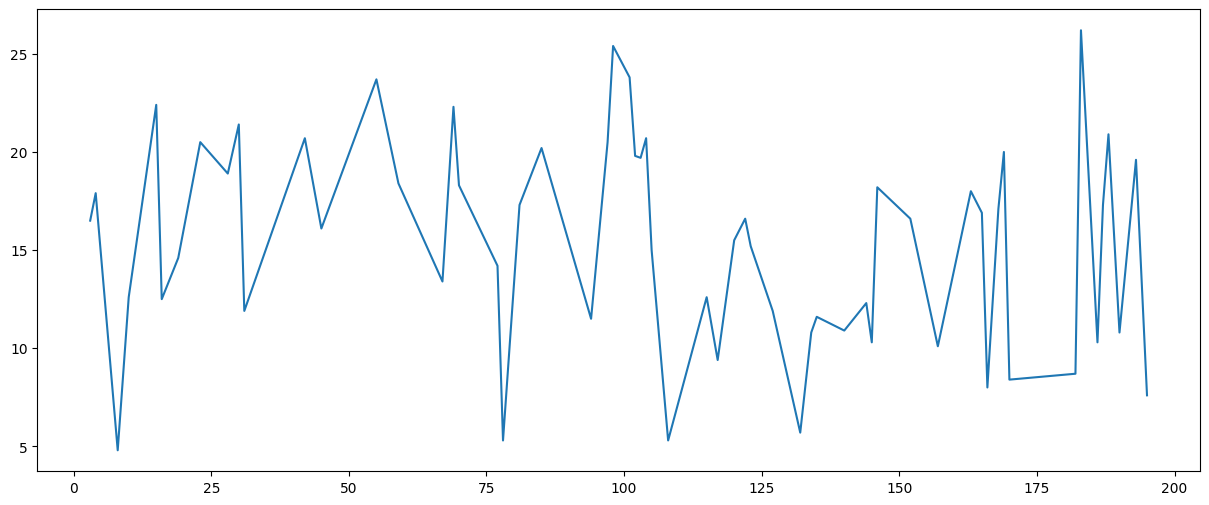

In [48]:
table_aux = pd.DataFrame()
table_aux["y_teste"] = y_teste
table_aux["Previsao Arvore Decisao"] = previsao_arvoredecisao
table_aux["Previsao Regressao Linear"] = previsao_regresaolinear
display(table_aux)

plt.figure(figsize=(15,6))
sns.lineplot(data=table_aux)
plt.show()

#### Como fazer uma nova previsão?

In [49]:
table2 = pd.read_csv("novos.csv")
display(table2)


previsao = modelo_arvoredecisao.predict(table2)
print(previsao)


,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.715  8.916 19.12 ]
